# Logistic Regression with Tensorflow

### Difference Between Linear and Logistic Regression
+ Linear : Estimating Continuous Variables
+ Logistic: Estimates for Classification

Logistic Regression is useful when the observed dependent variable is categorical. It produces a formula that predicts the probability of the class labels as a function of Independent Variables

Logistic Regression with Tensorflow
+ Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

### Understand Dataset

Iris Dataset: It is an inbuild dataset, So there is no need of preprocessing it,
+ Seperate Dataset into xs and ys 
+ training xs and ys
+ testing xs and ys

Attributes:
+ Petal Length
+ Petal Width
+ Sepal Length
+ Sepal Width

Dependent Variables:
+ Species
    + Iris Setosa
    + Iris Virginica
    + Iris Versicolor

In [2]:
iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]

In [8]:
iris_X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_y = pd.get_dummies(iris_y).values

In [11]:
iris_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [13]:
trainX,testX,trainY,testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state = 42)

In [14]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(99, 4)
(50, 4)
(99, 3)
(50, 3)


Define X and Y
+ Placeholders will hold iris dataand help pass them along to different part of algorithm
+ Data is passed to graph using feed_dict

Why Placeholders
+ It allows to create an algorithm which accepts data and knows something about the shape of the data without knowing the amount of data going in

+ In training, when the batches are inserted,it is easy to adjust how many examples to be trained on a single step without changing the entire algorithm

In [15]:
#numFeatures is the no. of features in the data. its values is 4 for iris
numFeatures = trainX.shape[1]

#numLabels is the no of classes that data points can be in, its value is 3
numLabels = trainY.shape[1]

#None means Tensorflow shouldn't expect the fixed number in that dimension
#iris has four features,so X is a tensor to hold the data.
X = tf.placeholder(tf.float32, [None, numFeatures])

#this will be the correct answer matrix for three classes
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [16]:
X

<tf.Tensor 'Placeholder:0' shape=(?, 4) dtype=float32>

In [17]:
yGold

<tf.Tensor 'Placeholder_1:0' shape=(?, 3) dtype=float32>

### Set Model Weights and Bias

+ Initialize both W and b as Tensors full of zeroes
+ These variables are the objects which define the structure of the regression model

+ Define two tensorflow variables as parameters. These Variables will hold the Weights and bias of Logistic Regression and they will be Updated Continuously during training

+ W has a shape [4,3]

+ b has a shape of [3]

In [19]:
# 4-dimensional input and 3 classes
W = tf.Variable(tf.zeros([4,3]))

# 3-dimensional output [0,0,1],[0,1,0],[1,0,0]
b = tf.Variable(tf.zeros([3]))

In [20]:
W

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32_ref>

In [21]:
b

<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>

In [22]:
# Randomly sample from a normal distribution with std dev = 0.01

weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                      mean = 0,
                                      stddev = 0.01,
                                      name = "weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                   mean = 0,
                                   stddev = 0.01,
                                   name = "bias"))

In [23]:
weights

<tf.Variable 'Variable_2:0' shape=(4, 3) dtype=float32_ref>

In [24]:
bias

<tf.Variable 'Variable_3:0' shape=(1, 3) dtype=float32_ref>

### Logistic Regression Model

Define the Operation to run the Logistic Regression LR

+ y = sigmoid(WX + b)

+ its three components
    + weight times feature matrix multiplication
    + Summation of weighted  features and a bias term
    + Application of sigmoid Function

In [25]:
# three components 
apply_weights_OP = tf.matmul(X, weights, name = "apply_weights")

add_bias_OP = tf.add(apply_weights_OP, bias, name = "add_bias")

activation_OP = tf.nn.sigmoid(add_bias_OP, name = "activation")

+ The function is implemented as tf.nn.sigmoid function.
+ Effectively, this fits the weighted input with bias into 0-100 percent curve, which is the probability function

### Training
Learning Algorithm is How to search for the best Vector(W). This search is an optimization problem looking for hypothesis that optimises an error/cost measure

+ What is the Measure of Model
    + Cost or Loss of Model
    + Objective to Minimize Cost or Loss

+ What is the Cost Function in the Model?
    + Squared Mean Error

+ How to Minimize Cost Function?
    + Using Gradient Descent

### Cost Function
Before Defining Cost Function, Define how long to train the Model and Define the Learning Rate

In [27]:
# No of Epochs in the Training
numEpochs = 700

# Define the Learning rate iteration (decay)
learningRate = tf.train.exponential_decay(learning_rate = 0.0008,
                                      global_step = 1,
                                      decay_steps = trainX.shape[0],
                                      decay_rate = 0.95,
                                      staircase = True)

In [28]:
#Defining the Cost Function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name = "squared_error_cost")

#Defining the Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

+ Initialize the weights and Biases with zero or random values
+ This Initialization will become node in graph, and when the graph puts in a session the op will run and create Variables

In [29]:
# create tensorflow session
sess = tf.Session()

# Initialize the weights and biases variables
init_OP = tf.global_variables_initializer()

#Initialize all tensorflow variables
sess.run(init_OP)

Additional operations to keep track the model's efficiency

In [30]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

Define and run the Actual Training Loop

In [31]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 33.948, change in cost 33.948
step 10, training accuracy 0.535354, cost 30.008, change in cost 3.94001
step 20, training accuracy 0.646465, cost 28.0686, change in cost 1.93937
step 30, training accuracy 0.646465, cost 26.4354, change in cost 1.63327
step 40, training accuracy 0.646465, cost 25.0801, change in cost 1.35528
step 50, training accuracy 0.646465, cost 23.9611, change in cost 1.11904
step 60, training accuracy 0.646465, cost 23.0349, change in cost 0.926163
step 70, training accuracy 0.646465, cost 22.2632, change in cost 0.771677
step 80, training accuracy 0.646465, cost 21.6145, change in cost 0.648735
step 90, training accuracy 0.646465, cost 21.0637, change in cost 0.550812
step 100, training accuracy 0.666667, cost 20.5912, change in cost 0.472422
step 110, training accuracy 0.666667, cost 20.182, change in cost 0.409216
step 120, training accuracy 0.666667, cost 19.8242, change in cost 0.357826
step 130, training accuracy 0.666

Plot the cost and Analyse

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


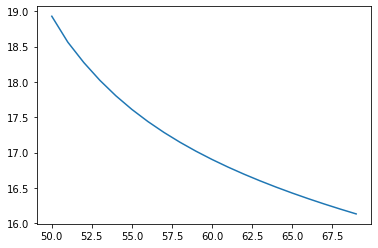

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

+ The Model's Final accuracy is 0.9
+ ie, A 90% Result which is not bad